In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [7]:
#Загрузка массива данных
load_stroke_array = np.loadtxt ('C:/Python/data/load_stroke_compression.csv', delimiter = ',', dtype=float, encoding='utf-8-sig')

In [12]:
#Класс определения сегментов нагрузки
class segments:
    #При создании экземпляра производится считывание массива данных и рассчет точки, гарантированно лежащей на линейном участке
    #Я, конечно, мог запихать весь код сюда, чтобы при одном создании экземпляра сразу выдавало интересующие точки и участки, но чем тогда это отличается от метода?
    #Честно говоря я не уверен насчет метода нахождения линейного участка, он зависит от задаваемой точности, но это лучшее, что я смог придумать
    def __init__ (self, load):
        self.load = load
        self.i_lin = 0
        self.i_str = 0
        self.i_end = 0
        for self.i_lin in range(len(self.load[:,0])-3):
            tan_1 = (self.load[self.i_lin,1] - self.load[self.i_lin+1,1])/(self.load[self.i_lin,0] - self.load[self.i_lin+1,0])
            tan_2 = (self.load[self.i_lin,1] - self.load[self.i_lin+2,1])/(self.load[self.i_lin,0] - self.load[self.i_lin+2,0])
            tan_3 = (self.load[self.i_lin,1] - self.load[self.i_lin+3,1])/(self.load[self.i_lin,0] - self.load[self.i_lin+3,0])
            if 0.95 <= tan_2/tan_1 <= 1.05 and 0.95<= tan_3/tan_2 <= 1.05 and 0.95<= tan_3/tan_1 <= 1.05:
                break
            else:
                self.i_lin+=1
    
    def strt(self):
        #Поиск начала линейного участка
        #Согласно ГОСТ 25.503-97 пределом пропорциональности (конец линейного участка) считается точка, в которой тангенс угла наклона к оси ординат
        #превышает в 1,5 раза таковой тангенс угла на линейном участке. Для нахождения начала линейного участка используем это же условие
        i_str = self.i_lin
        tan_str = (self.load[i_str+1,0] - self.load[i_str,0])/(self.load[i_str+1,1] - self.load[i_str,1])
        k = 0
        while k <= 1.5*tan_str:
            i_str -= 1
            k = (self.load[i_str+1,0] - self.load[i_str,0])/(self.load[i_str+1,1] - self.load[i_str,1])
        i_str += 1
        self.i_str = i_str
        return i_str
   
    def end(self):
    #Поиск конца линейного участка, аналогично началу
        i_end = self.i_lin
        tan_end = (self.load[i_end+1,0] - self.load[i_end,0])/(self.load[i_end+1,1] - self.load[i_end,1])
        k = 0
        while k <= 1.5*tan_end:
            i_end += 1
            k = (self.load[i_end+1,0] - self.load[i_end,0])/(self.load[i_end+1,1] - self.load[i_end,1])
        self.i_end = i_end
        return i_end
#Построение графика
    def graph(self):
        array_str = self.load[0:self.i_str+1, :]
        array_lin = self.load[self.i_str:self.i_end+1, :]
        array_end = self.load[self.i_end:, :]
        plt.figure(figsize=(10, 5))
        plt.plot(array_str[:, 0], array_str[:, 1], '-', color = 'green', label='Начальный участок')
        plt.plot(array_lin[:, 0], array_lin[:, 1], '-', color = 'blue', label='Линейный участок')
        plt.plot(array_end[:, 0], array_end[:, 1], '-', color = 'red', label='Участок упрочнения')
        plt.plot(self.load[self.i_str, 0], self.load[self.i_str, 1], 'o', color = 'black', label='Начало линейного участка')
        plt.plot(self.load[self.i_end, 0], self.load[self.i_end, 1], 'o', color = 'black', label='Конец линейного участка')
        plt.legend()
        plt.grid(True)

Индекс точки начала линейного участка: 4 , номер в списке: 5
Индекс точки конца линейного участка: 14 , номер в списке: 15


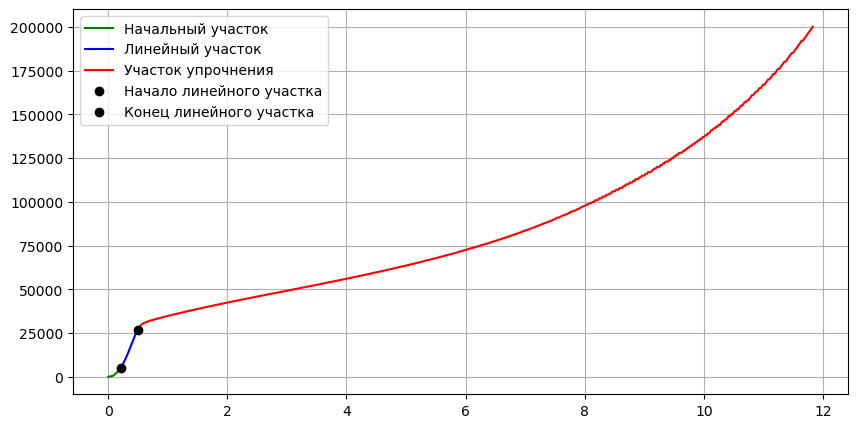

In [14]:
array = segments(load_stroke_array[:,:])
print('Индекс точки начала линейного участка:', array.strt(), ', номер в списке:', array.strt()+1)
print('Индекс точки конца линейного участка:', array.end(), ', номер в списке:', array.end()+1)
array.graph()
plt.show()